
Confusion matrix of K-Means clustering : 
 [[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]

Accuracy score using K-Means clustering :  0.8933333333333333

Classification report of K-Means clustering : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150


Confusion matrix of EM : 
 [[50  0  0]
 [ 0 45  5]
 [ 0  0 50]]

Accuracy score using EM :  0.9666666666666667

Classification report of EM : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.90      0.95        50
           2       0.91      1.00      0.95        50

    accuracy                           0.97       150
   macro 

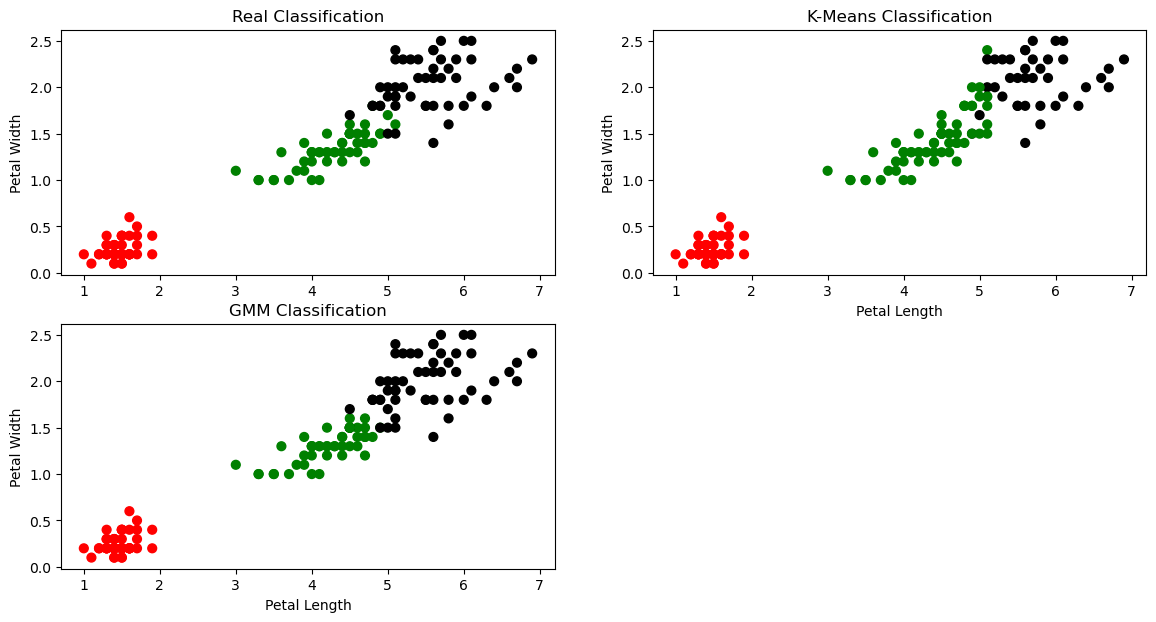

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import matplotlib.pyplot as plt

Dataset=load_iris()
X=pd.DataFrame(Dataset.data)
X.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y=pd.DataFrame(Dataset.target)
y.columns=['Targets']

model=KMeans(n_clusters=3,random_state=2)
model.fit(X)
plt.figure(figsize=(14,7))
colormap=np.array(['red','green','black'])

plt.subplot(2,2,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets],s=40)
plt.title('Real Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.subplot(2,2,2)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[model.labels_],s=40)
plt.title('K-Means Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

print("\nConfusion matrix of K-Means clustering : \n",confusion_matrix(y,model.labels_))
print("\nAccuracy score using K-Means clustering : ",accuracy_score(y,model.labels_))
print("\nClassification report of K-Means clustering : \n",classification_report(y,model.labels_))

# GMM PLOT
scaler=preprocessing.StandardScaler()
scaler.fit(X)
xsa=scaler.transform(X)
xs=pd.DataFrame(xsa,columns=X.columns)

gmm=GaussianMixture(n_components=3,random_state=0)
gmm.fit(xs)
y_gmm=gmm.predict(xs)

plt.subplot(2,2,3)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_gmm],s=40)
plt.title('GMM Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

print("\nConfusion matrix of EM : \n",confusion_matrix(y,y_gmm))
print("\nAccuracy score using EM : ",accuracy_score(y,y_gmm))
print("\nClassification report of EM : \n",classification_report(y,y_gmm))

Text(0, 0.5, 'Petal Width')

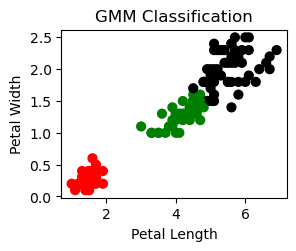

In [3]:
plt.subplot(2,2,3)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_gmm],s=40)
plt.title('GMM Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')